In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder


In [192]:
df = pd.read_csv("C:\\Users\\alinp\\OneDrive\\Desktop\\DATASETS\\city_day.csv")
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [193]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [194]:
df.describe()


PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [195]:
# FILLING OF MISSING VALUES

In [196]:
numeric_columns = df.columns[2:15]  # Select only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [197]:
print(df.isnull().sum())

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


In [198]:
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])


<AxesSubplot:>

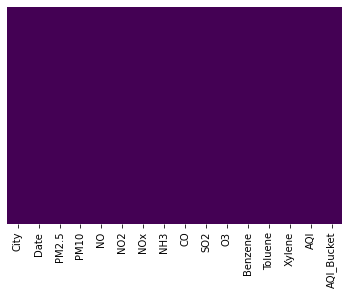

In [199]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [200]:
df.head()


City        Date      PM2.5        PM10     NO    NO2    NOx  \
0  Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1  Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2  Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3  Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4  Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   

         NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0  23.483476   0.92  27.64  133.36     0.00     0.02    0.00  166.463581   
1  23.483476   0.97  24.55   34.06     3.68     5.50    3.77  166.463581   
2  23.483476  17.40  29.07   30.70     6.80    16.40    2.25  166.463581   
3  23.483476   1.70  18.59   36.08     4.43    10.14    1.00  166.463581   
4  23.483476  22.10  39.33   39.31     7.01    18.89    2.78  166.463581   

  AQI_Bucket  
0   Moderate  
1   Moderate  
2   Moderate  
3   Moderate  
4   Moderate

In [201]:
# CORRELATION ANALYSIS

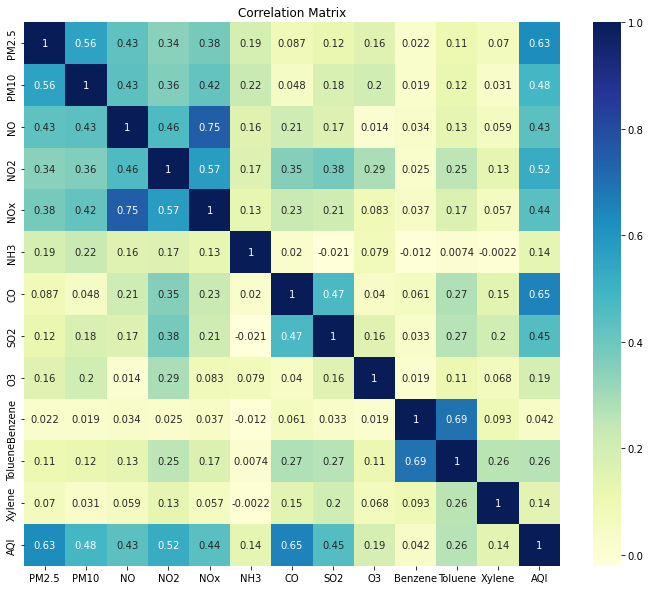

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12,10))  # Increase the size of the figure

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')  # Use the 'YlGnBu' colormap

plt.title('Correlation Matrix')
plt.show()

In [203]:
# DISTRIBUTION OF POLLUTANTS

In [204]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']

Distribution of different pollutants in last 5 years


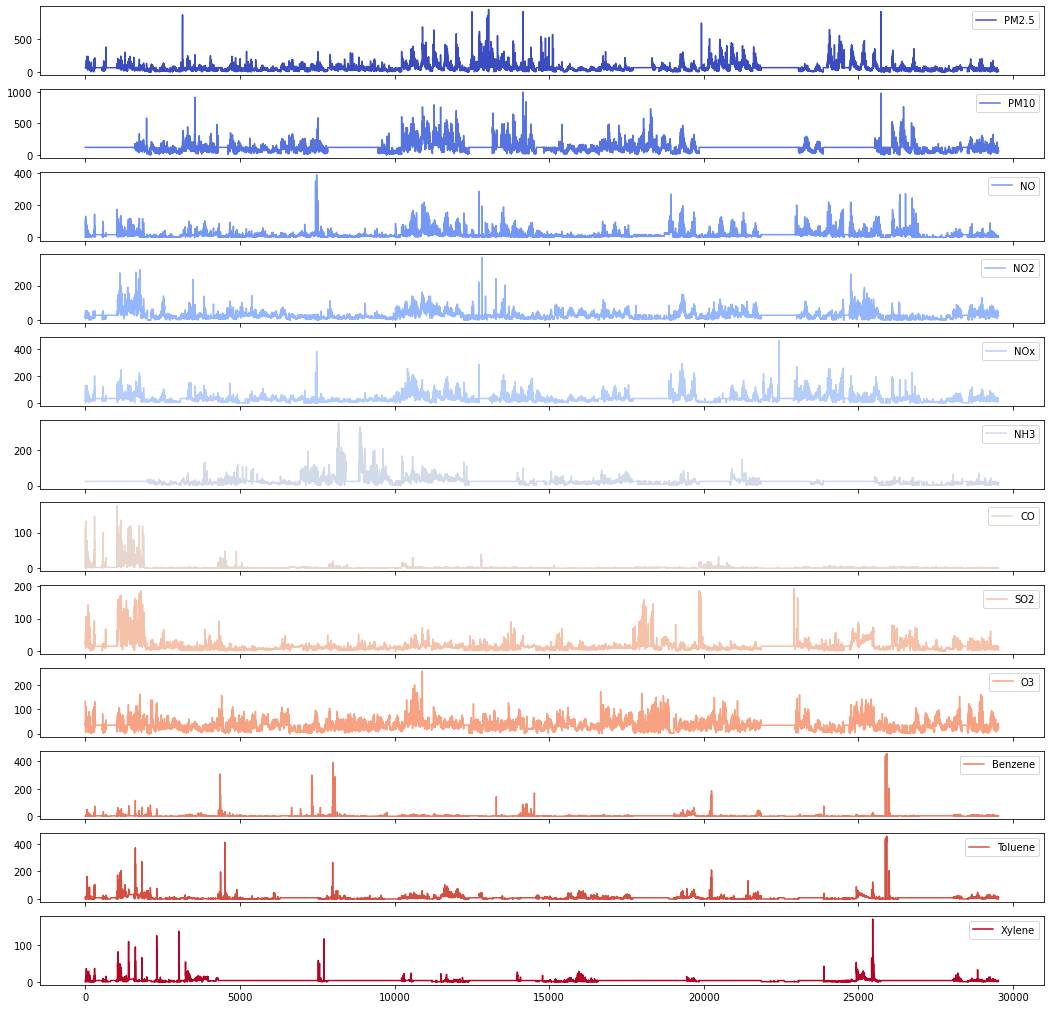

In [205]:
df_city= df[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

In [206]:
# level of O3 is high  AND CO is low

In [207]:
# Bar plot for pollutants of each city

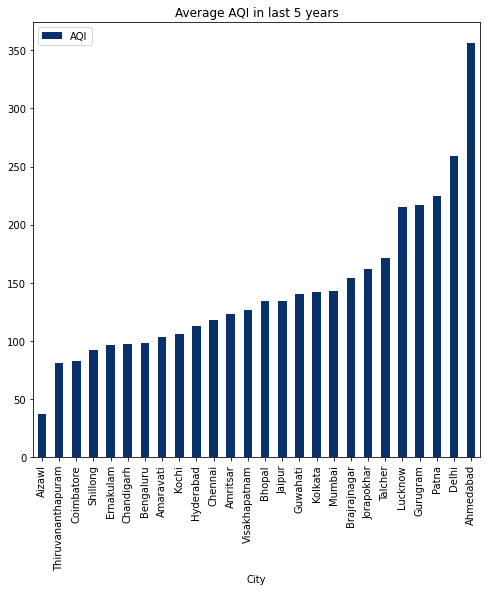

In [208]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

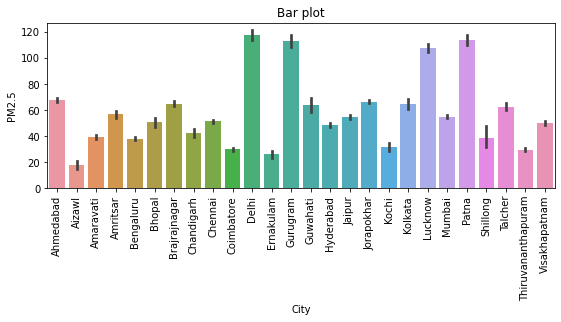

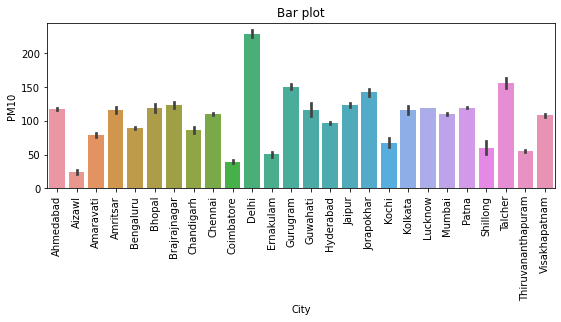

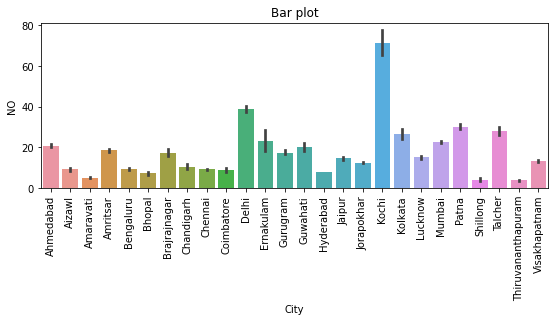

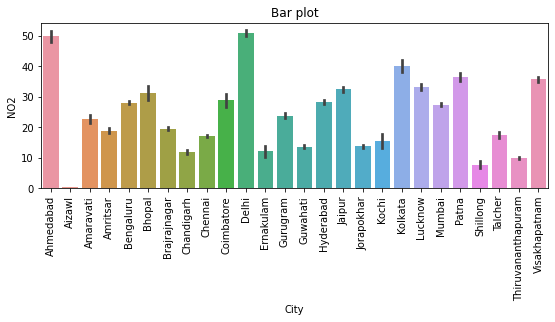

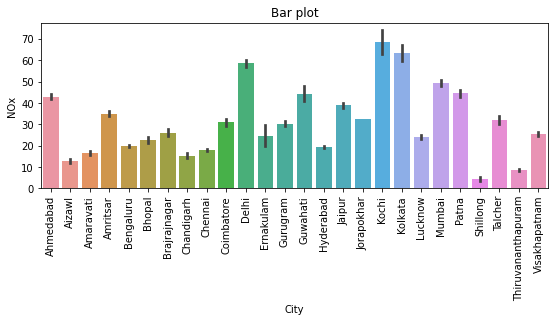

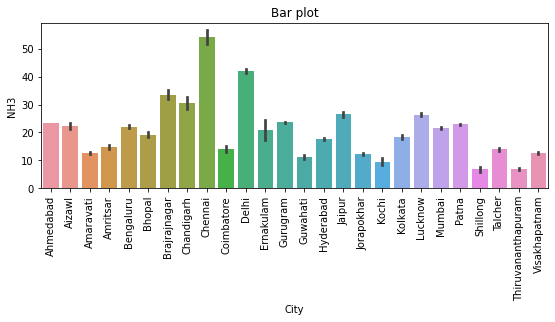

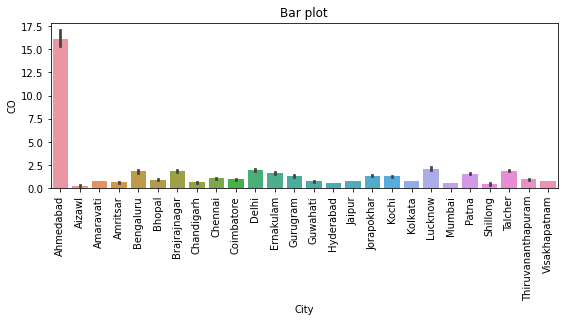

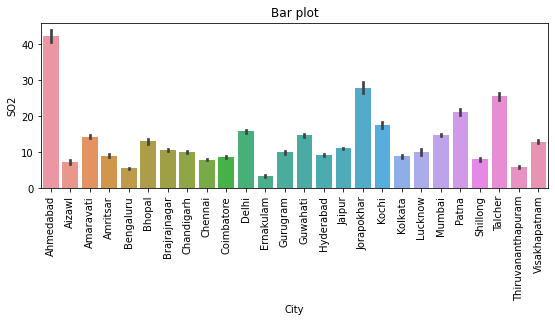

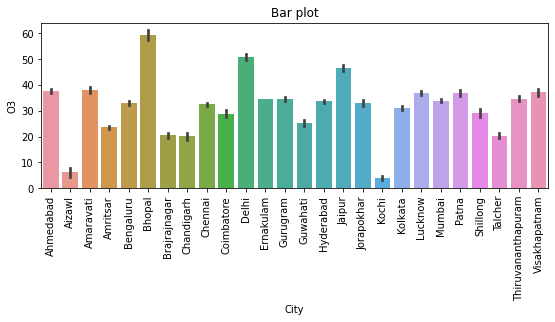

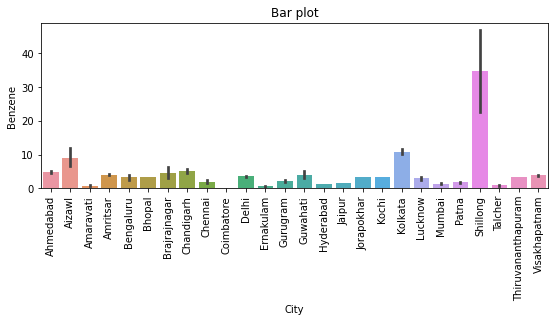

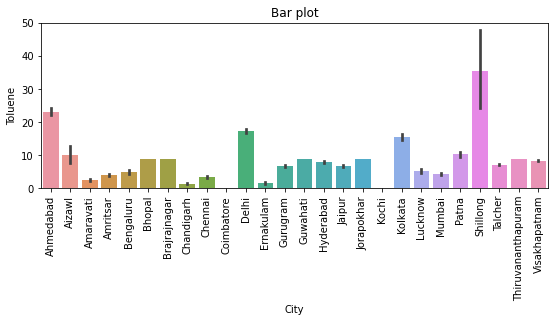

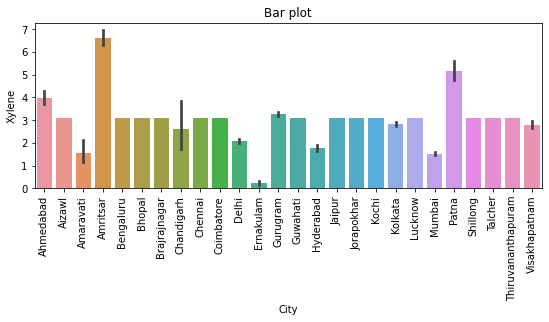

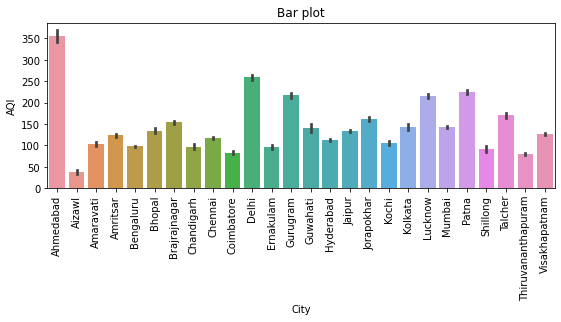

In [209]:
col=df.iloc[:,2:15]
import seaborn as sns

for i,col in enumerate(col):
  
         plt.figure(figsize=(20,25))
         plt.subplot(7,2,i+1)
         sns.barplot(x='City',y=col,data=df)
         plt.xticks(rotation='vertical')
         plt.title("Bar plot")

In [210]:
# Outlier Detection and removel of outliers


<AxesSubplot:title={'center':'Boxplot'}>

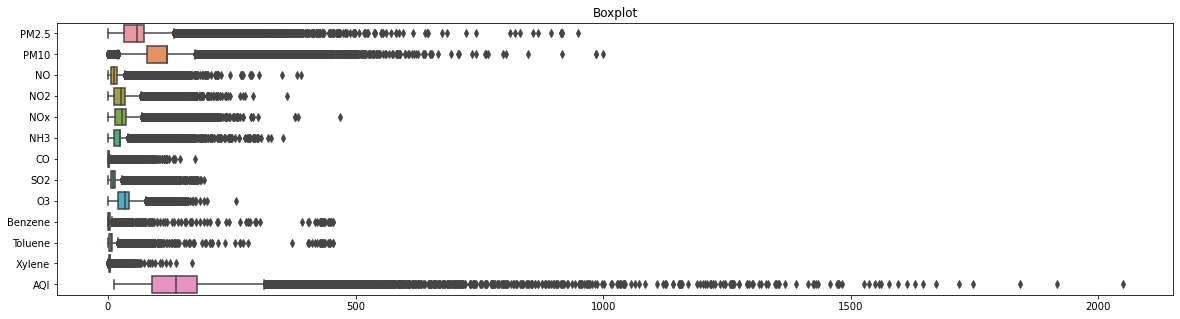

In [211]:
plt.figure(figsize=(20,5))
plt.title("Boxplot")
sns.boxplot(data=df,orient="h")

In [212]:
drop_outlier = df[(df['AQI']>500) | (df['PM2.5']>200) | (df['NO']>65) |(df['NH3']>50) | (df['NO2']>100) | (df['NOx']>90) | (df['PM10']>210) | (df['Benzene']>50) |  (df['Toluene']>50) | (df['SO2']>50) | (df['Xylene']>50)].index


In [213]:
df = df.drop(drop_outlier)


In [214]:
df

City        Date      PM2.5        PM10     NO    NO2    NOx  \
0          Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1          Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2          Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3          Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4          Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   
...              ...         ...        ...         ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.020000   50.940000   7.68  25.06  19.54   
29527  Visakhapatnam  2020-06-28  24.380000   74.090000   3.42  26.06  16.53   
29528  Visakhapatnam  2020-06-29  22.910000   65.730000   3.45  29.53  18.33   
29529  Visakhapatnam  2020-06-30  16.640000   49.970000   4.05  29.26  18.80   
29530  Visakhapatnam  2020-07-01  15.000000   66.000000   0.40  26.85  14.05   

             NH3     CO    SO2      O3  Benzene    Toluene    Xylene  \
0      23.483476   0.92  27.64  133.36  0.00000   0.020000  0.000000   
1      23.483476   0.97  24.55   34.06  3.68000   5.500000  3.770000   
2      23.483476  17.40  29.07   30.70  6.80000  16.400000  2.250000   
3      23.483476   1.70  18.59   36.08  4.43000  10.140000  1.000000   
4      23.483476  22.10  39.33   39.31  7.01000  18.890000  2.780000   
...          ...    ...    ...     ...      ...        ...       ...   
29526  12.470000   0.47   8.55   23.30  2.24000  12.070000  0.730000   
29527  11.990000   0.52  12.72   30.14  0.74000   2.210000  0.380000   
29528  10.710000   0.48   8.42   30.96  0.01000   0.010000  0.000000   
29529  10.030000   0.52   9.84   28.30  0.00000   0.000000  0.000000   
29530   5.200000   0.59   2.10   17.05  3.28084   8.700972  3.070128   

              AQI    AQI_Bucket  
0      166.463581      Moderate  
1      166.463581      Moderate  
2      166.463581      Moderate  
3      166.463581      Moderate  
4      166.463581      Moderate  
...           ...           ...  
29526   41.000000          Good  
29527   70.000000  Satisfactory  
29528   68.000000  Satisfactory  
29529   54.000000  Satisfactory  
29530   50.000000          Good  

[23181 rows x 16 columns]

Text(0.5, 1.0, 'Scatter plot of AQI Bucket Vs PM2.5')

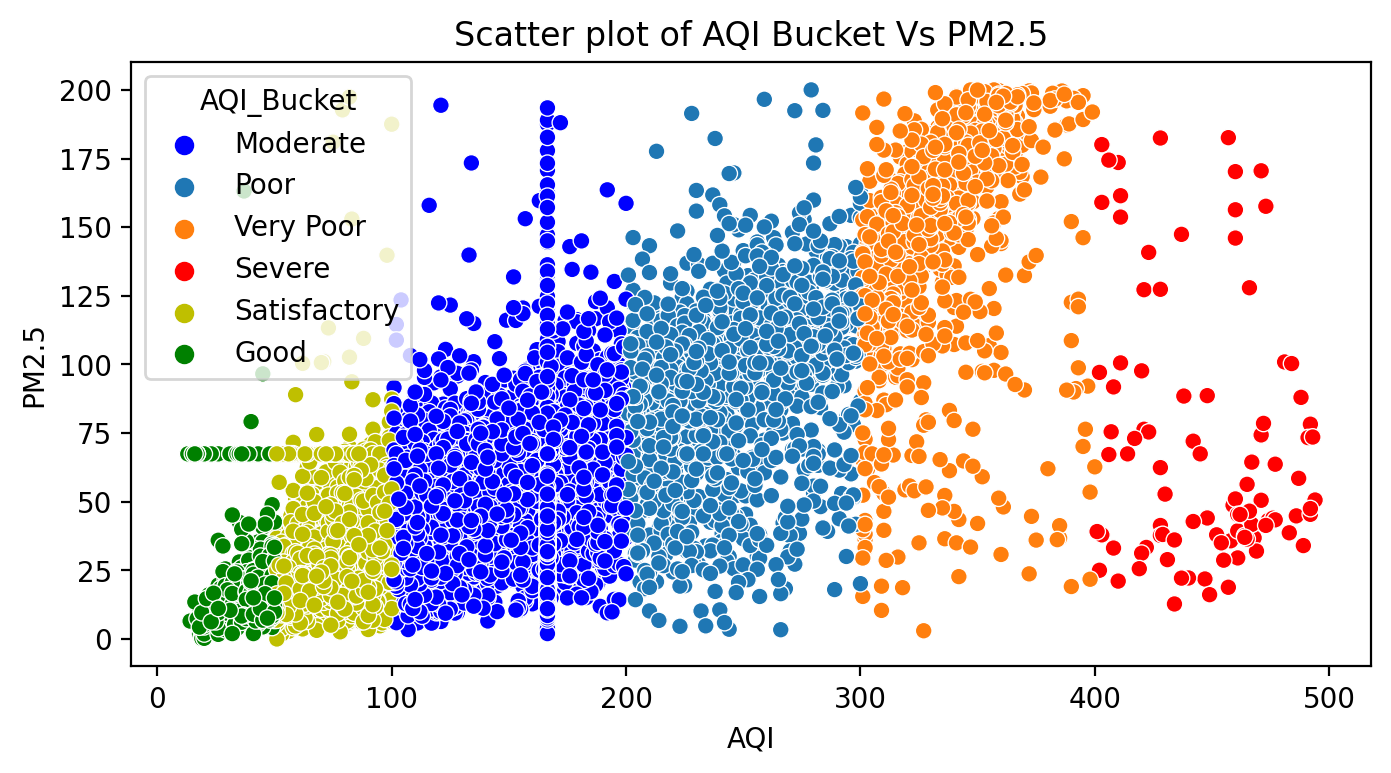

In [215]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM2.5', data=df,hue ='AQI_Bucket',palette = palette, ci= None)
plt.title("Scatter plot of AQI Bucket Vs PM2.5")

Text(0.5, 1.0, 'Scatter plot of AQI Bucket Vs PM10')

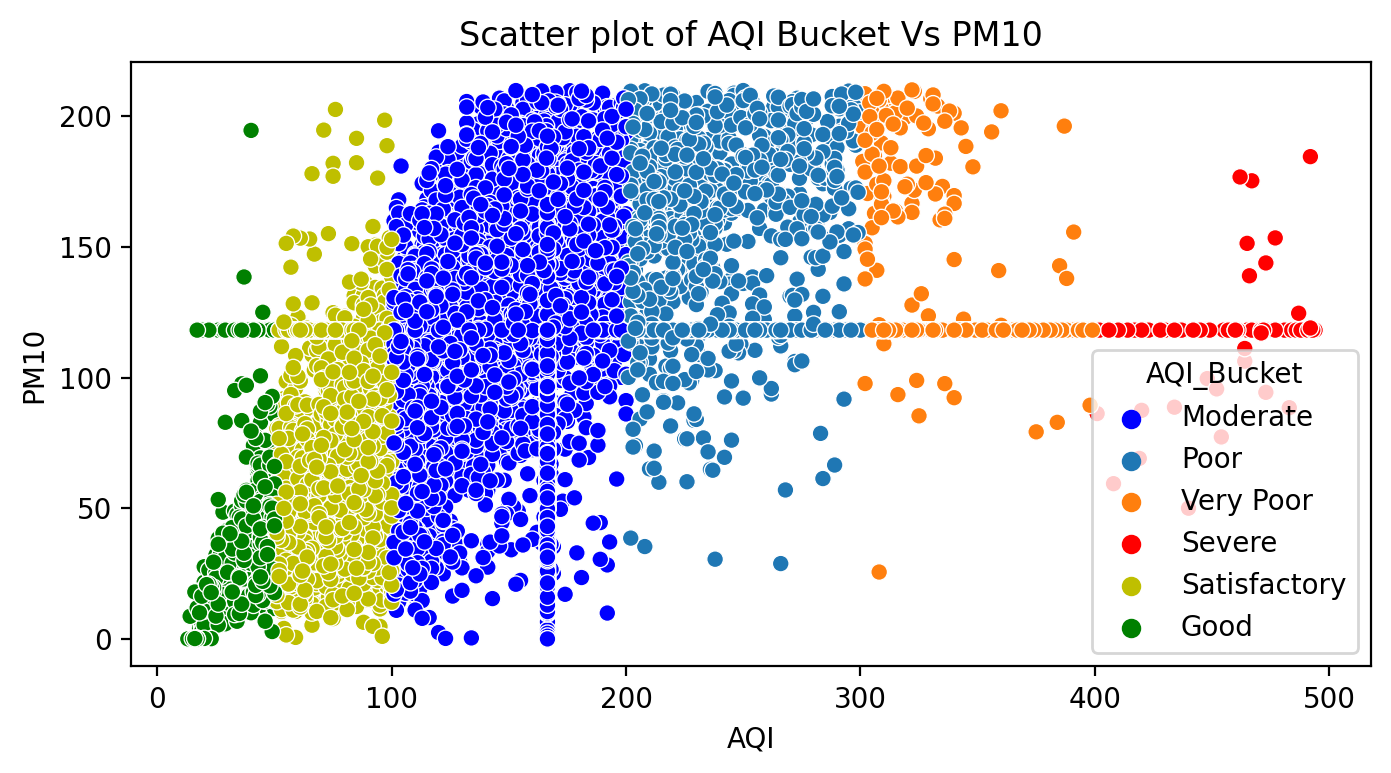

In [216]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM10', data=df,hue ='AQI_Bucket',palette = palette, ci= None)
plt.title("Scatter plot of AQI Bucket Vs PM10")

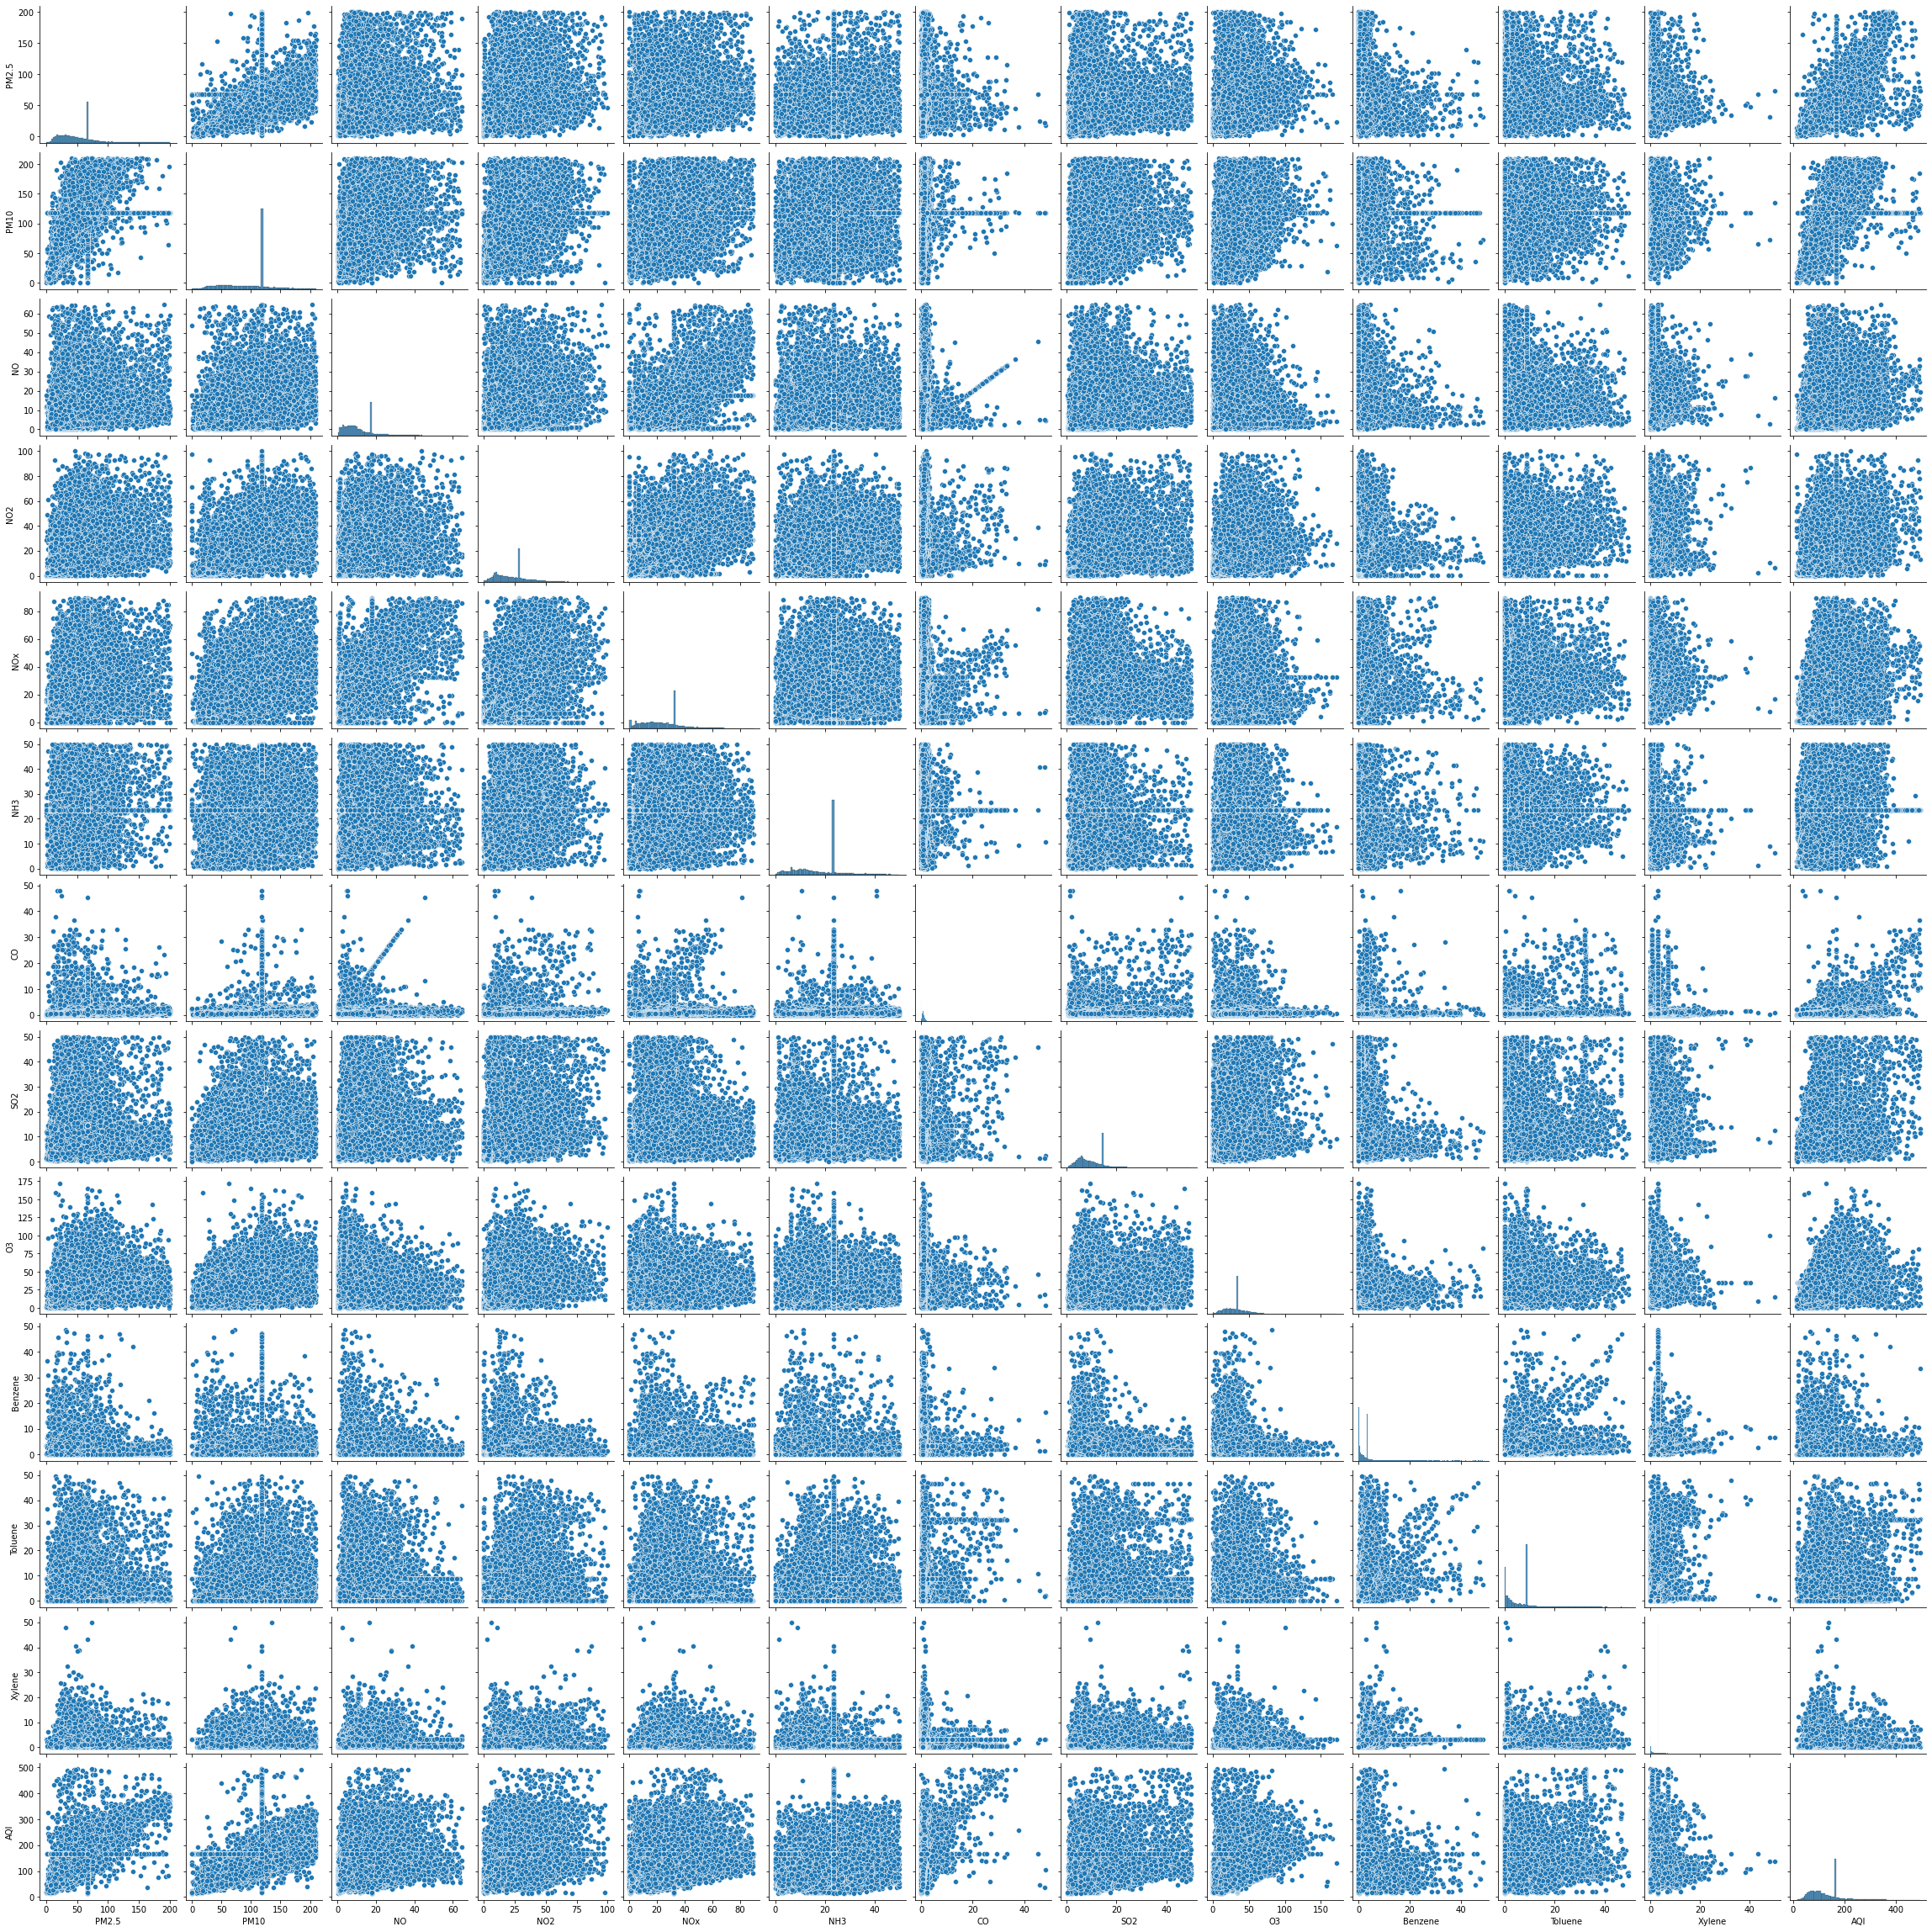

In [217]:
sns.pairplot(df)
plt.show()

In [218]:
# From pairplot there is no correlation between explanatory variables after deleting outliers

In [219]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])

In [220]:
df

City        Date      PM2.5        PM10     NO    NO2    NOx  \
0         0  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1         0  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2         0  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3         0  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4         0  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   
...     ...         ...        ...         ...    ...    ...    ...   
29526    25  2020-06-27  15.020000   50.940000   7.68  25.06  19.54   
29527    25  2020-06-28  24.380000   74.090000   3.42  26.06  16.53   
29528    25  2020-06-29  22.910000   65.730000   3.45  29.53  18.33   
29529    25  2020-06-30  16.640000   49.970000   4.05  29.26  18.80   
29530    25  2020-07-01  15.000000   66.000000   0.40  26.85  14.05   

             NH3     CO    SO2      O3  Benzene    Toluene    Xylene  \
0      23.483476   0.92  27.64  133.36  0.00000   0.020000  0.000000   
1      23.483476   0.97  24.55   34.06  3.68000   5.500000  3.770000   
2      23.483476  17.40  29.07   30.70  6.80000  16.400000  2.250000   
3      23.483476   1.70  18.59   36.08  4.43000  10.140000  1.000000   
4      23.483476  22.10  39.33   39.31  7.01000  18.890000  2.780000   
...          ...    ...    ...     ...      ...        ...       ...   
29526  12.470000   0.47   8.55   23.30  2.24000  12.070000  0.730000   
29527  11.990000   0.52  12.72   30.14  0.74000   2.210000  0.380000   
29528  10.710000   0.48   8.42   30.96  0.01000   0.010000  0.000000   
29529  10.030000   0.52   9.84   28.30  0.00000   0.000000  0.000000   
29530   5.200000   0.59   2.10   17.05  3.28084   8.700972  3.070128   

              AQI  AQI_Bucket  
0      166.463581           1  
1      166.463581           1  
2      166.463581           1  
3      166.463581           1  
4      166.463581           1  
...           ...         ...  
29526   41.000000           0  
29527   70.000000           3  
29528   68.000000           3  
29529   54.000000           3  
29530   50.000000           0  

[23181 rows x 16 columns]

In [221]:
# Splitting the dataset

In [245]:
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2','O3',  'Toluene','Benzene', 'Xylene','AQI']]
y = df[['AQI_Bucket']]

In [246]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


In [247]:
X_test

PM2.5        PM10        NO        NO2    NOx        NH3  \
27167   53.080000   71.910000   1.87000  15.320000   9.51   7.090000   
20897  181.720000  118.127103  26.03000  46.830000  45.63  44.110000   
17265   61.690000  159.440000  40.36000  47.860000  75.95  33.870000   
3606    67.450578   35.590000   9.76000  10.340000  20.11   5.910000   
16767   52.640000  104.960000   5.95000  19.590000   6.04  22.440000   
...           ...         ...       ...        ...    ...        ...   
6556    20.030000  121.910000   1.16000   5.980000   4.16   9.850000   
9848    33.900000   46.170000   6.38000   4.630000  11.01   5.880000   
28756   20.640000   84.060000   9.32000  29.740000  23.52  10.080000   
25763   67.450578   33.730000  17.57473  28.560659   0.00  23.483476   
9394    59.540000  118.127103  10.06000  18.690000  30.53   1.850000   

             CO    SO2     O3   Toluene  Benzene     Xylene    AQI  
27167  1.590000   4.72  69.77  8.700972  3.28084   3.070128  157.0  
20897  1.280000   8.03  37.44  1.070000  1.28000   3.070128  361.0  
17265  1.660000  14.65  40.73  9.720000  2.42000   3.070128  154.0  
3606   2.248598   7.25  38.17  1.360000  1.80000  10.340000   44.0  
16767  0.000000   7.74  83.65  0.900000  2.19000   3.070128  121.0  
...         ...    ...    ...       ...      ...        ...    ...  
6556   0.320000  13.42  69.97  8.700972  3.28084   3.070128   98.0  
9848   1.200000  10.29  21.44  0.200000  0.03000   3.070128   64.0  
28756  0.440000   9.07  18.33  8.710000  4.60000   2.450000  101.0  
25763  0.300000   5.56  44.83  0.000000  0.00000   3.070128   54.0  
9394   1.070000   6.59  12.89  3.340000  0.02000   3.070128  111.0  

[4637 rows x 13 columns]

In [262]:
X_test.to_csv("input for AQI Test")

In [248]:
##########     Model Creation     ##########

In [249]:
# 1. Gaussian

In [250]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print('Naive Bayes:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Naive Bayes:
Accuracy: 0.8910933793400906
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       270
           1       0.95      0.89      0.92      2343
           2       0.80      0.88      0.84       341
           3       0.85      0.90      0.88      1503
           4       0.75      0.94      0.83        16
           5       0.90      0.90      0.90       164

    accuracy                           0.89      4637
   macro avg       0.84      0.89      0.86      4637
weighted avg       0.89      0.89      0.89      4637

Confusion Matrix:
[[ 225    2    0   43    0    0]
 [   0 2090   63  187    0    3]
 [   0   28  301    0    0   12]
 [  67   82    0 1354    0    0]
 [   0    0    0    0   15    1]
 [   0    0   12    0    5  147]]


C:\Users\alinp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [251]:
# 2. SVM

In [252]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Support Vector Machines (SVM):')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

C:\Users\alinp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Support Vector Machines (SVM):
Accuracy: 0.9905111063187406
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       270
           1       0.99      1.00      1.00      2343
           2       1.00      0.97      0.98       341
           3       0.99      0.99      0.99      1503
           4       1.00      0.94      0.97        16
           5       0.96      0.99      0.98       164

    accuracy                           0.99      4637
   macro avg       0.99      0.97      0.98      4637
weighted avg       0.99      0.99      0.99      4637

Confusion Matrix:
[[ 254    0    0   16    0    0]
 [   0 2338    0    5    0    0]
 [   0    4  331    0    0    6]
 [   0   11    0 1492    0    0]
 [   0    0    0    0   15    1]
 [   0    0    1    0    0  163]]


In [253]:
# 3. DecisionTree Classifier 

In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Decision Tree:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Decision Tree:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       1.00      1.00      1.00      2343
           2       1.00      1.00      1.00       341
           3       1.00      1.00      1.00      1503
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00       164

    accuracy                           1.00      4637
   macro avg       1.00      1.00      1.00      4637
weighted avg       1.00      1.00      1.00      4637

Confusion Matrix:
[[ 270    0    0    0    0    0]
 [   0 2343    0    0    0    0]
 [   0    0  341    0    0    0]
 [   0    0    0 1503    0    0]
 [   0    0    0    0   16    0]
 [   0    0    0    0    0  164]]


In [255]:
# 4. RandomForest Classifier

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

C:\Users\alinp\AppData\Local\Temp/ipykernel_26080/601723439.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest:
Accuracy: 0.9984904032779814
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       1.00      1.00      1.00      2343
           2       0.99      0.99      0.99       341
           3       1.00      1.00      1.00      1503
           4       1.00      0.88      0.93        16
           5       0.98      0.98      0.98       164

    accuracy                           1.00      4637
   macro avg       1.00      0.98      0.98      4637
weighted avg       1.00      1.00      1.00      4637

Confusion Matrix:
[[ 270    0    0    0    0    0]
 [   0 2343    0    0    0    0]
 [   0    1  339    0    0    1]
 [   0    0    0 1503    0    0]
 [   0    0    0    0   14    2]
 [   0    0    3    0    0  161]]


In [257]:
# 5. KNeighbors Classifier

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('K-Nearest Neighbors (KNN):')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

C:\Users\alinp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors (KNN):
Accuracy: 0.9525555315937029
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       270
           1       0.96      0.97      0.97      2343
           2       0.96      0.94      0.95       341
           3       0.93      0.94      0.94      1503
           4       1.00      0.94      0.97        16
           5       0.95      0.95      0.95       164

    accuracy                           0.95      4637
   macro avg       0.96      0.94      0.95      4637
weighted avg       0.95      0.95      0.95      4637

Confusion Matrix:
[[ 234    0    0   36    0    0]
 [   0 2274    4   65    0    0]
 [   0   13  321    0    0    7]
 [  15   71    0 1417    0    0]
 [   0    0    0    0   15    1]
 [   0    0    8    0    0  156]]


In [259]:
# CONCLUSION:
 
#          From the above created models DecisionTree Classifier gives the best result
#          So we choose DecisionTree Classifier model for future Prediction



In [ ]:
# Testing with  random input vlaues and the result

In [261]:
input_data = np.array([[ 59.95,182.15,31.6,29.53,59.14,16.11,0.0,5.17,18.41,15.45,1.97,11.45,145.0]]) 
y_pred =  dt.predict(input_data)
predicted_label = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"][y_pred[0]]

print("Predicted Label:", predicted_label)

Predicted Label: Satisfactory
